# Appendix B. Python scripts for Health Products Dataset 

## Table of Contents:

1. [Pre-Processing Data](#Pre-Processing-Data)

   1.1. [Importing all required libraries](#Importing-all-required-libraries)
    
   1.2. [Descriptive Part](#Descriptive-Part)
        
   1.3. [Data Cleaning](#Data-Cleaning)
        
     1.3.1. [Missing Values](#Missing-Values)
     
      1.3.2. [Duplicate Values](#Duplicate-Values) 
***

2. [Correlation Matrix](#Correlation-Matrix) 

***

3. [Data Visualisation](#Data-Visualisation) 


   3.1. [Brand Analysis](#Brand-Analysis)
   
   3.2. [Sub Category Analysis](#Sub-Category-Analysis)
      
   3.3. [Shippment Analysis](#Shippment-Analysis)
   
   3.4.[Country Analysis](#Country-Analysis)
       

   *****
   
4. [Data Modelling](#Data-Modelling)   

   4.1. [Regression Models ](#Regression-Models)

      4.1.1. [Linear Regression for Line-Item Quantity](#Linear-Regression-for-Line-Item-Quantity)


## Pre-Processing Data

### Importing all required libraries

In [ ]:
pip install pandas ortools

In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from plotly.offline import iplot, init_notebook_mode
import pickle
import warnings
warnings.filterwarnings("ignore") 
import datetime as dt
from datetime import datetime
import plotly.express as px
import ortools.constraint_solver
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
from scipy.optimize import linprog
from pylab import rcParams
import scipy
from scipy.stats.stats import pearsonr
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import top_k_accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report

In [3]:
HPSCData=pd.read_csv("SCMS_Delivery_History_Dataset_20150929.csv",encoding='latin1')#I have to use the encoding as latin1 to read this file as there are some special character)

## Descriptive Part

In [4]:
HPSCData.shape  #Checking the lengths of the array dimensions

(10324, 33)

In [5]:
HPSCData.dtypes  #Checking the number of variables and their type

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


***

In [6]:
HPSCData.head(10)  #Checking the top 10 rows in the dataset

ID Project Code            PQ # PO / SO # ASN/DN #        Country  \
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   
5  23   112-NG-T01  Pre-PQ Process   SCMS-87   ASN-57        Nigeria   
6  44   110-ZM-T01  Pre-PQ Process  SCMS-139  ASN-130         Zambia   
7  45   109-TZ-T01  Pre-PQ Process  SCMS-140   ASN-94       Tanzania   
8  46   112-NG-T01  Pre-PQ Process  SCMS-156   ASN-93        Nigeria   
9  47   110-ZM-T01  Pre-PQ Process  SCMS-165  ASN-199         Zambia   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  ...  \
0   PMO - US  Direct Drop              EXW           Air  ...   
1   PMO - US  Direct Drop              EXW           Air  ...   
2   PMO - US  Direct Drop              FCA           Air  ...   
3   PMO - US  Direct Drop              EXW           Air  ...   
4   PMO - US  Direct Drop              EXW           Air  ...   
5   PMO - US  Direct Drop              EXW           Air  ...   
6   PMO - US  Direct Drop              DDU           Air  ...   
7   PMO - US  Direct Drop              EXW           Air  ...   
8   PMO - US  Direct Drop              EXW           Air  ...   
9   PMO - US  Direct Drop              CIP           Air  ...   

  Unit of Measure (Per Pack) Line Item Quantity Line Item Value Pack Price  \
0                         30                 19          551.00      29.00   
1                        240               1000         6200.00       6.20   
2                        100                500        40000.00      80.00   
3                         60              31920       127360.80       3.99   
4                         60              38000       121600.00       3.20   
5                        240                416         2225.60       5.35   
6                         90                135         4374.00      32.40   
7                         60              16667        60834.55       3.65   
8                         60                273          532.35       1.95   
9                        120               2800       115080.00      41.10   

  Unit Price              Manufacturing Site First Line Designation  \
0       0.97      Ranbaxy Fine Chemicals LTD                    Yes   
1       0.03       Aurobindo Unit III, India                    Yes   
2       0.80   ABBVIE GmbH & Co.KG Wiesbaden                    Yes   
3       0.07   Ranbaxy, Paonta Shahib, India                    Yes   
4       0.05       Aurobindo Unit III, India                    Yes   
5       0.02       Aurobindo Unit III, India                    Yes   
6       0.36   MSD South Granville Australia                    Yes   
7       0.06       Aurobindo Unit III, India                    Yes   
8       0.03       Aurobindo Unit III, India                     No   
9       0.34  ABBVIE (Abbott) St. P'burg USA                    Yes   

      Weight (Kilograms)                  Freight Cost (USD)  \
0                     13                              780.34   
1                    358                              4521.5   
2                    171                             1653.78   
3                   1855                            16007.06   
4                   7590                            45450.08   
5                    504                             5920.42   
6                    328  Freight Included in Commodity Cost   
7                   1478                             6212.41   
8  See ASN-93 (ID#:1281)               See ASN-93 (ID#:1281)   
9                    643  Freight Included in Commodity Cost   

  Line Item Insurance (USD)  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN 

***

In [7]:
HPSCData.info()  #Checking the type of column structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

***

In [8]:
HPSCData.describe()  # Returning statistical description of the data in the Dataset

ID  Unit of Measure (Per Pack)  Line Item Quantity  \
count  10324.000000                10324.000000        10324.000000   
mean   51098.968229                   77.990895        18332.534870   
std    31944.332496                   76.579764        40035.302961   
min        1.000000                    1.000000            1.000000   
25%    12795.750000                   30.000000          408.000000   
50%    57540.500000                   60.000000         3000.000000   
75%    83648.250000                   90.000000        17039.750000   
max    86823.000000                 1000.000000       619999.000000   

       Line Item Value    Pack Price    Unit Price  Line Item Insurance (USD)  
count     1.032400e+04  10324.000000  10324.000000               10037.000000  
mean      1.576506e+05     21.910241      0.611701                 240.117626  
std       3.452921e+05     45.609223      3.275808                 500.190568  
min       0.000000e+00      0.000000      0.000000                   0.000000  
25%       4.314593e+03      4.120000      0.080000                   6.510000  
50%       3.047147e+04      9.300000      0.160000                  47.040000  
75%       1.664471e+05     23.592500      0.470000                 252.400000  
max       5.951990e+06   1345.640000    238.650000                7708.440000

A brief explanation of the values in the table above:

1)According to the information obtained in the previous tables, the values in each row are 10324. By seeing the count row of the above table, it can be concluded that "Line Item Insurance (USD)" has missing values.

2)Since the target variable is "Line Item Quantity", its descriptive statistics indicators are significant.
The average of the variables is 18332.53, with a minimum of 1.0 and a maximum of 619999.0.  This variable has a very wide Range, so its values are more dispersed.

As the Second Quantile (Q2) is the Median, the median value is 3000.0, less than the mean, so the data have a right-skewed distribution. Meaning that there are a lot of very large values in the data, and that is why the average is skewed towards them.

## Data Cleaning

### Missing Values

In [9]:
np.sum(HPSCData.isna()) #Checking the number of missing values for each variable

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [10]:
HPSCData['Line Item Insurance (USD)']=HPSCData['Line Item Insurance (USD)'].fillna(0)

In [11]:
HPSCData['Dosage']=HPSCData['Dosage'].fillna("Unknown")

In [12]:
HPSCData['Shipment Mode']=HPSCData['Shipment Mode'].fillna("Unknown")

### Duplicate Values

In [13]:
HPSCData.duplicated().sum()

0

This dataset also has no duplicate values.

### Cleaning

In [14]:
HPSCData.columns = [col.lower().replace(' ', '_') for col in HPSCData.columns]
HPSCData.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)

In [15]:
HPSCData.columns

Index(['id', 'project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_per_pack', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_kilograms', 'freight_cost_usd',
       'line_item_insurance_usd'],
      dtype='object')

## Correlation Matrix

To find important parameters, data correlation is performed.

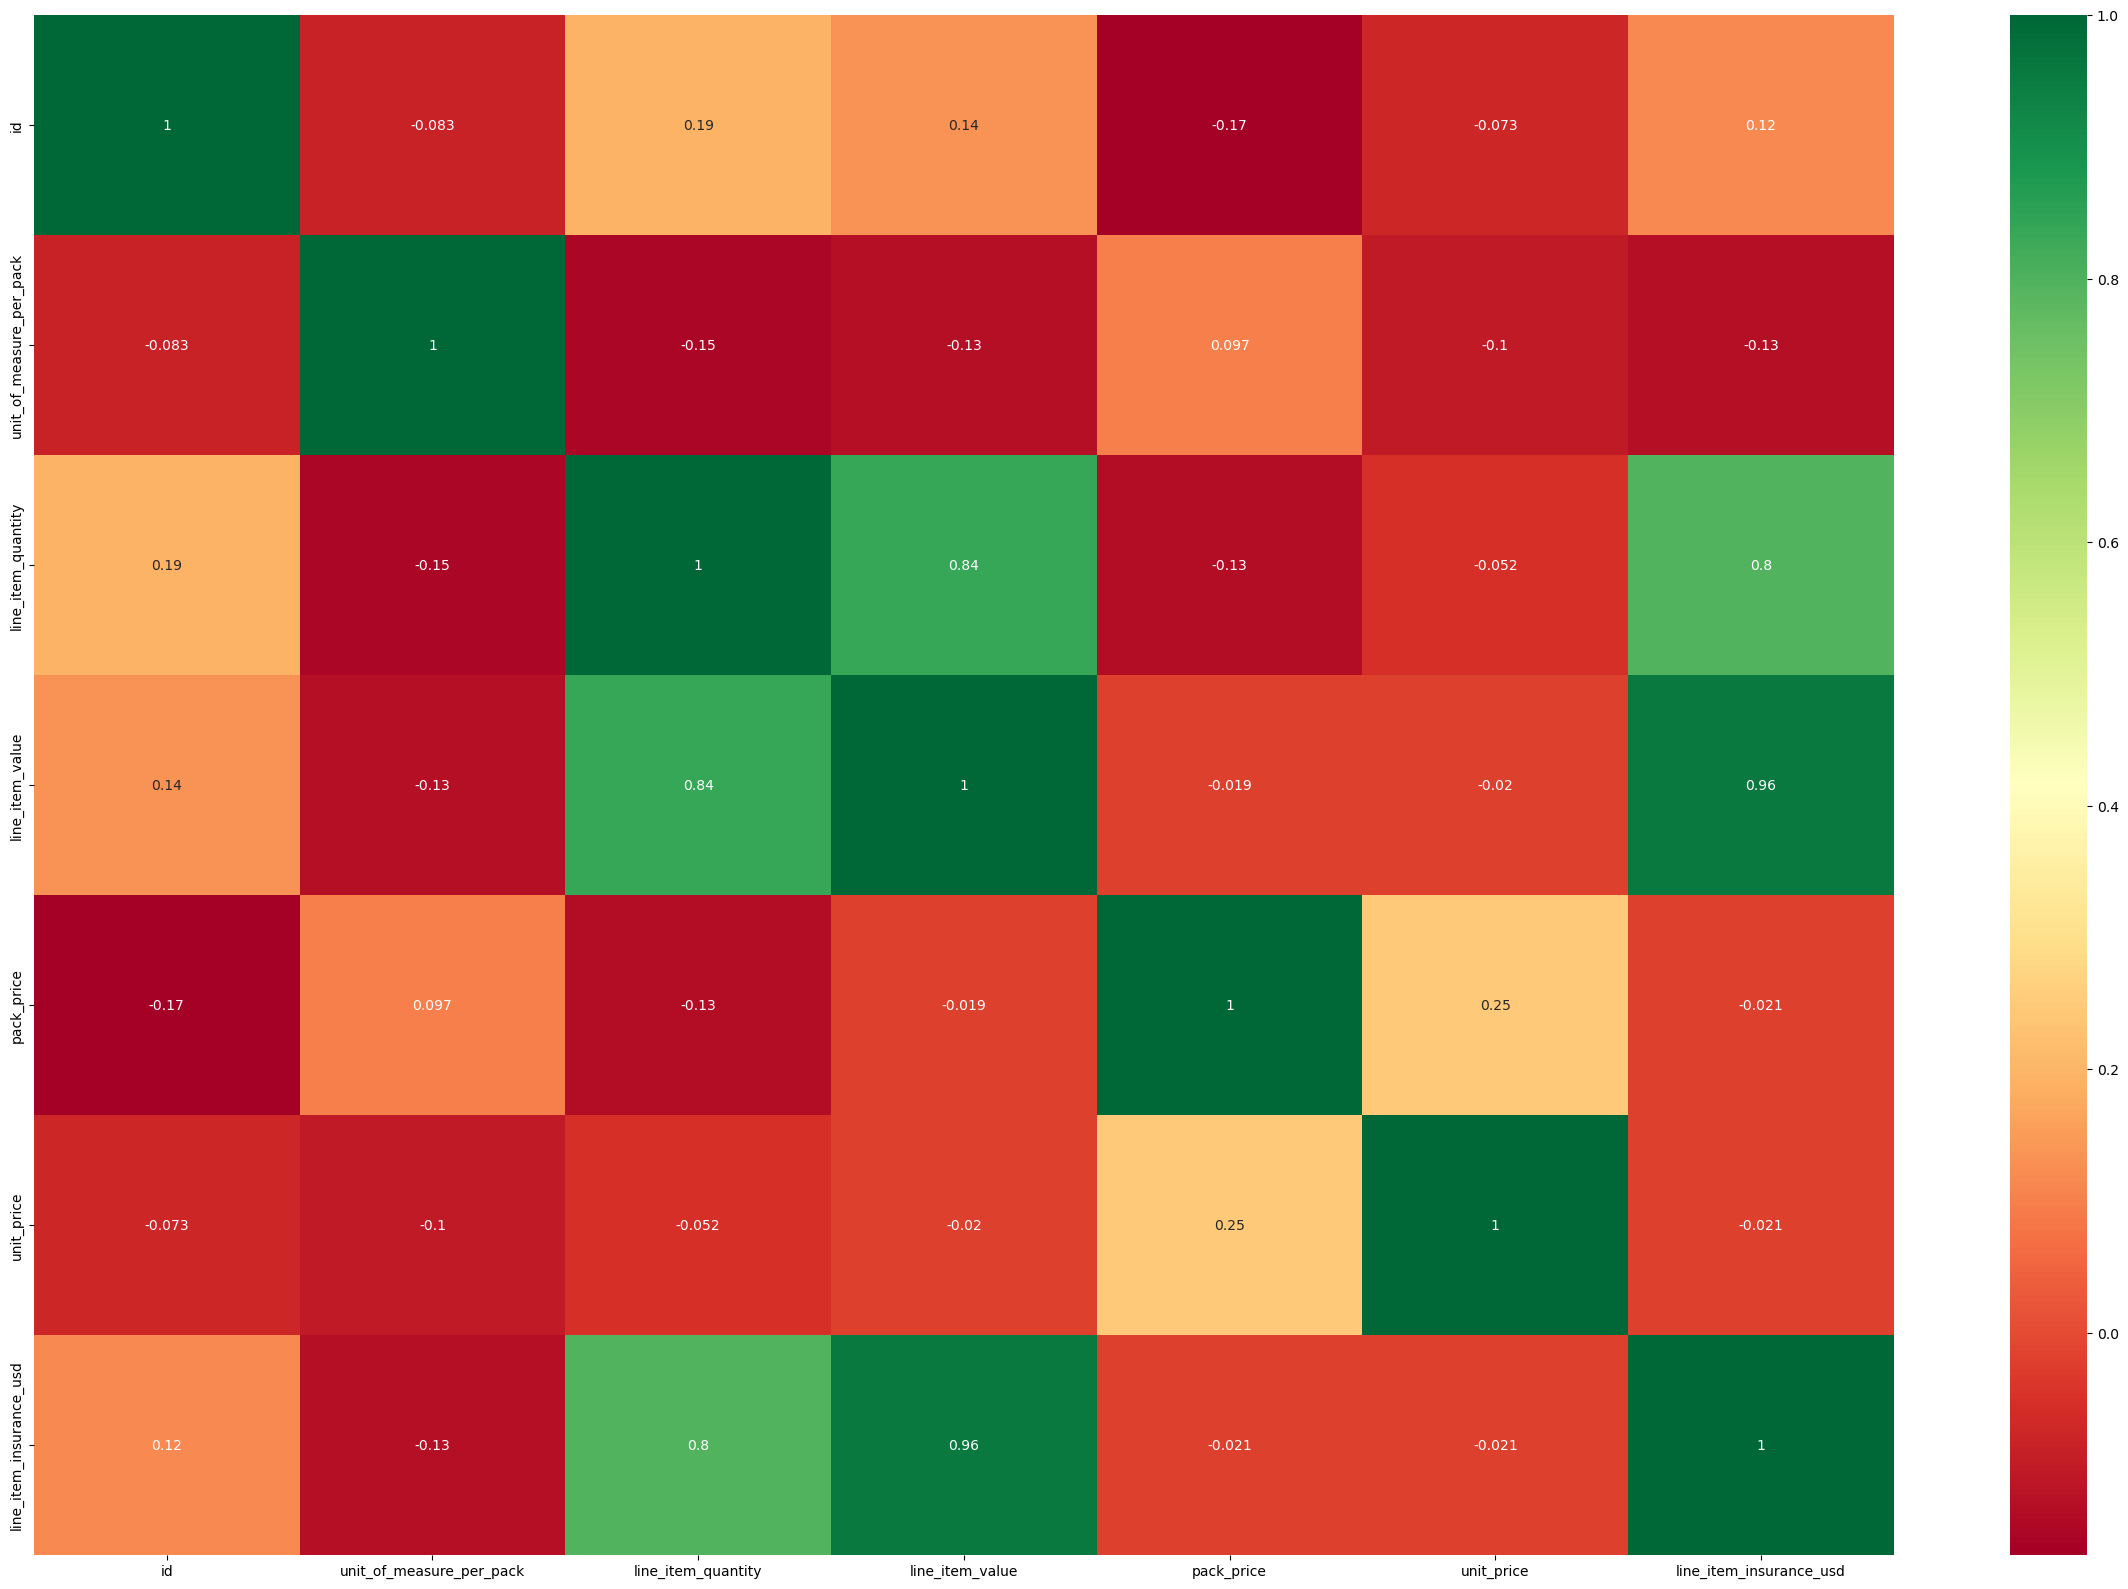

In [16]:
corrmap = HPSCData.corr()
top=corrmap.index
plt.figure(figsize=(30,20))
g=sns.heatmap(HPSCData[top].corr(),annot=True,cmap="RdYlGn")

To examine the relationship between the 'country', 'shipment_mode', 'sub_classification', 'brand', 'dosage',
       'dosage_form,'vendor', 'freight_cost_usd'and the Line item quantity, we must first convert these object characteristics into the "int" type using the following library and code:

In [17]:
HP_SC = HPSCData.copy()

In [18]:
le = preprocessing.LabelEncoder()# create the Labelencoder object
HP_SC['country']= le.fit_transform(HP_SC['country'])#convert the categorical columns into numeric
HP_SC['shipment_mode']= le.fit_transform(HP_SC['shipment_mode'])
HP_SC['sub_classification']= le.fit_transform(HP_SC['sub_classification'])
HP_SC['brand']= le.fit_transform(HP_SC['brand'])
HP_SC['dosage']= le.fit_transform(HP_SC['dosage'])
HP_SC['dosage_form']= le.fit_transform(HP_SC['dosage_form'])
HP_SC['vendor']= le.fit_transform(HP_SC['vendor'])
HP_SC['freight_cost_usd']= le.fit_transform(HP_SC['freight_cost_usd'])
HP_SC[ 'product_group']= le.fit_transform(HP_SC[ 'product_group'])


<Axes: >

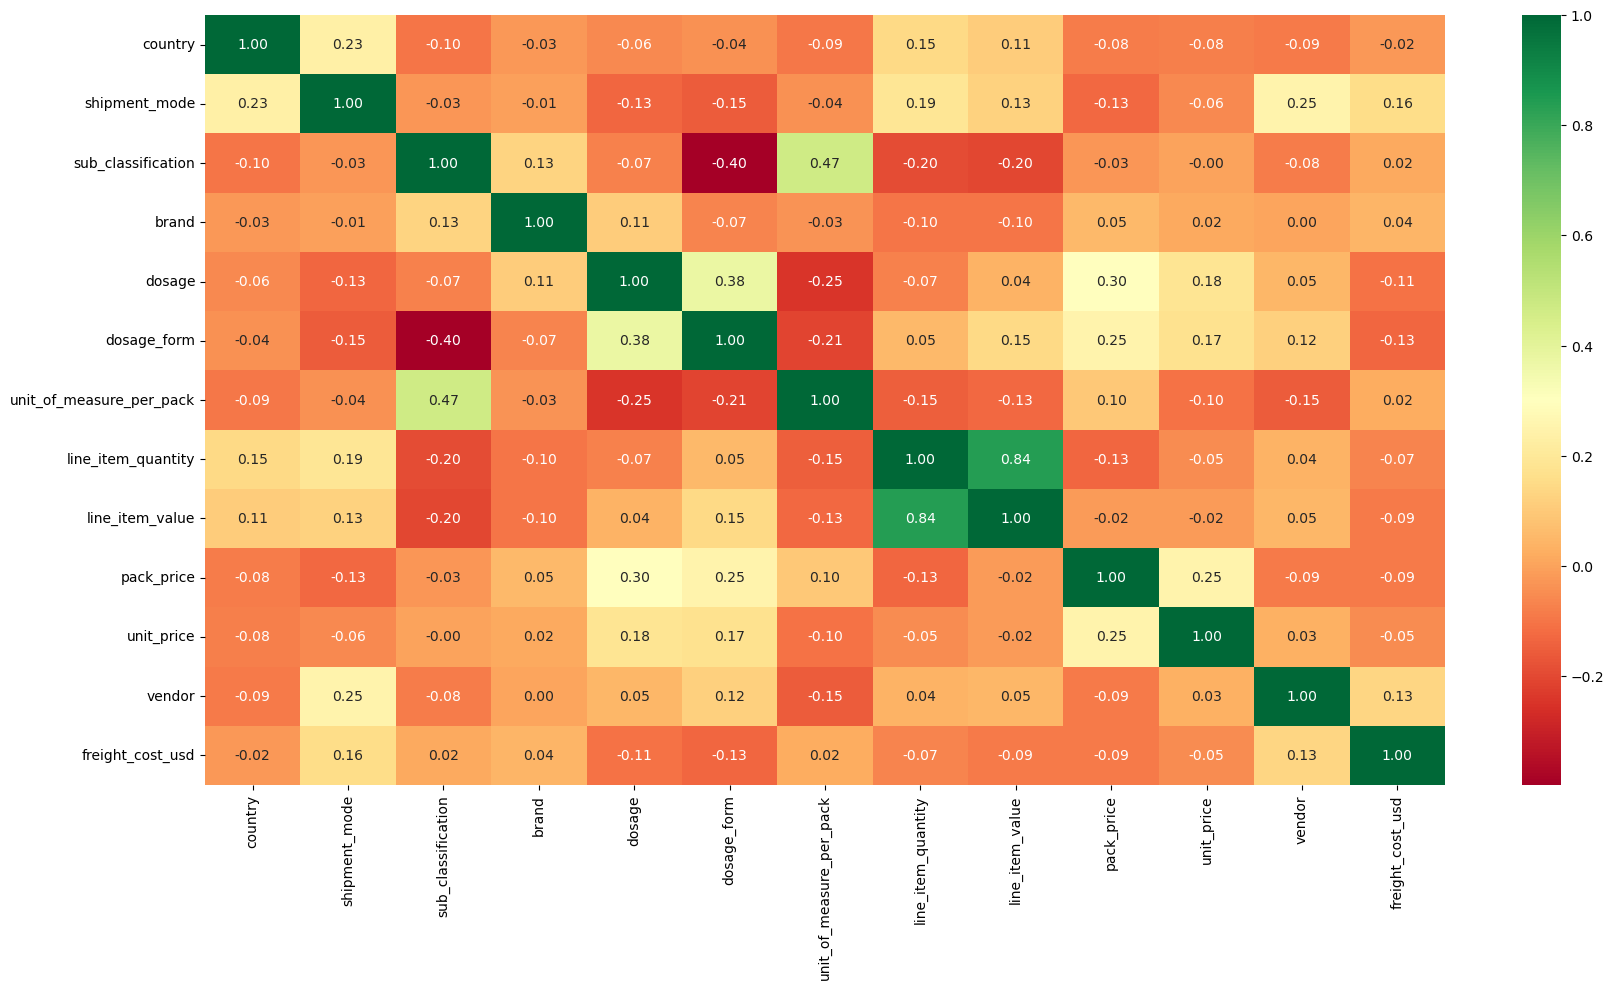

In [19]:
Quantity_features=HP_SC[['country', 'shipment_mode', 'sub_classification', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_per_pack', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price','vendor','freight_cost_usd']]
fig = plt.figure(figsize=(20,10))
sns.heatmap(Quantity_features.corr(), annot = True, fmt = '.2f', cmap = "RdYlGn")

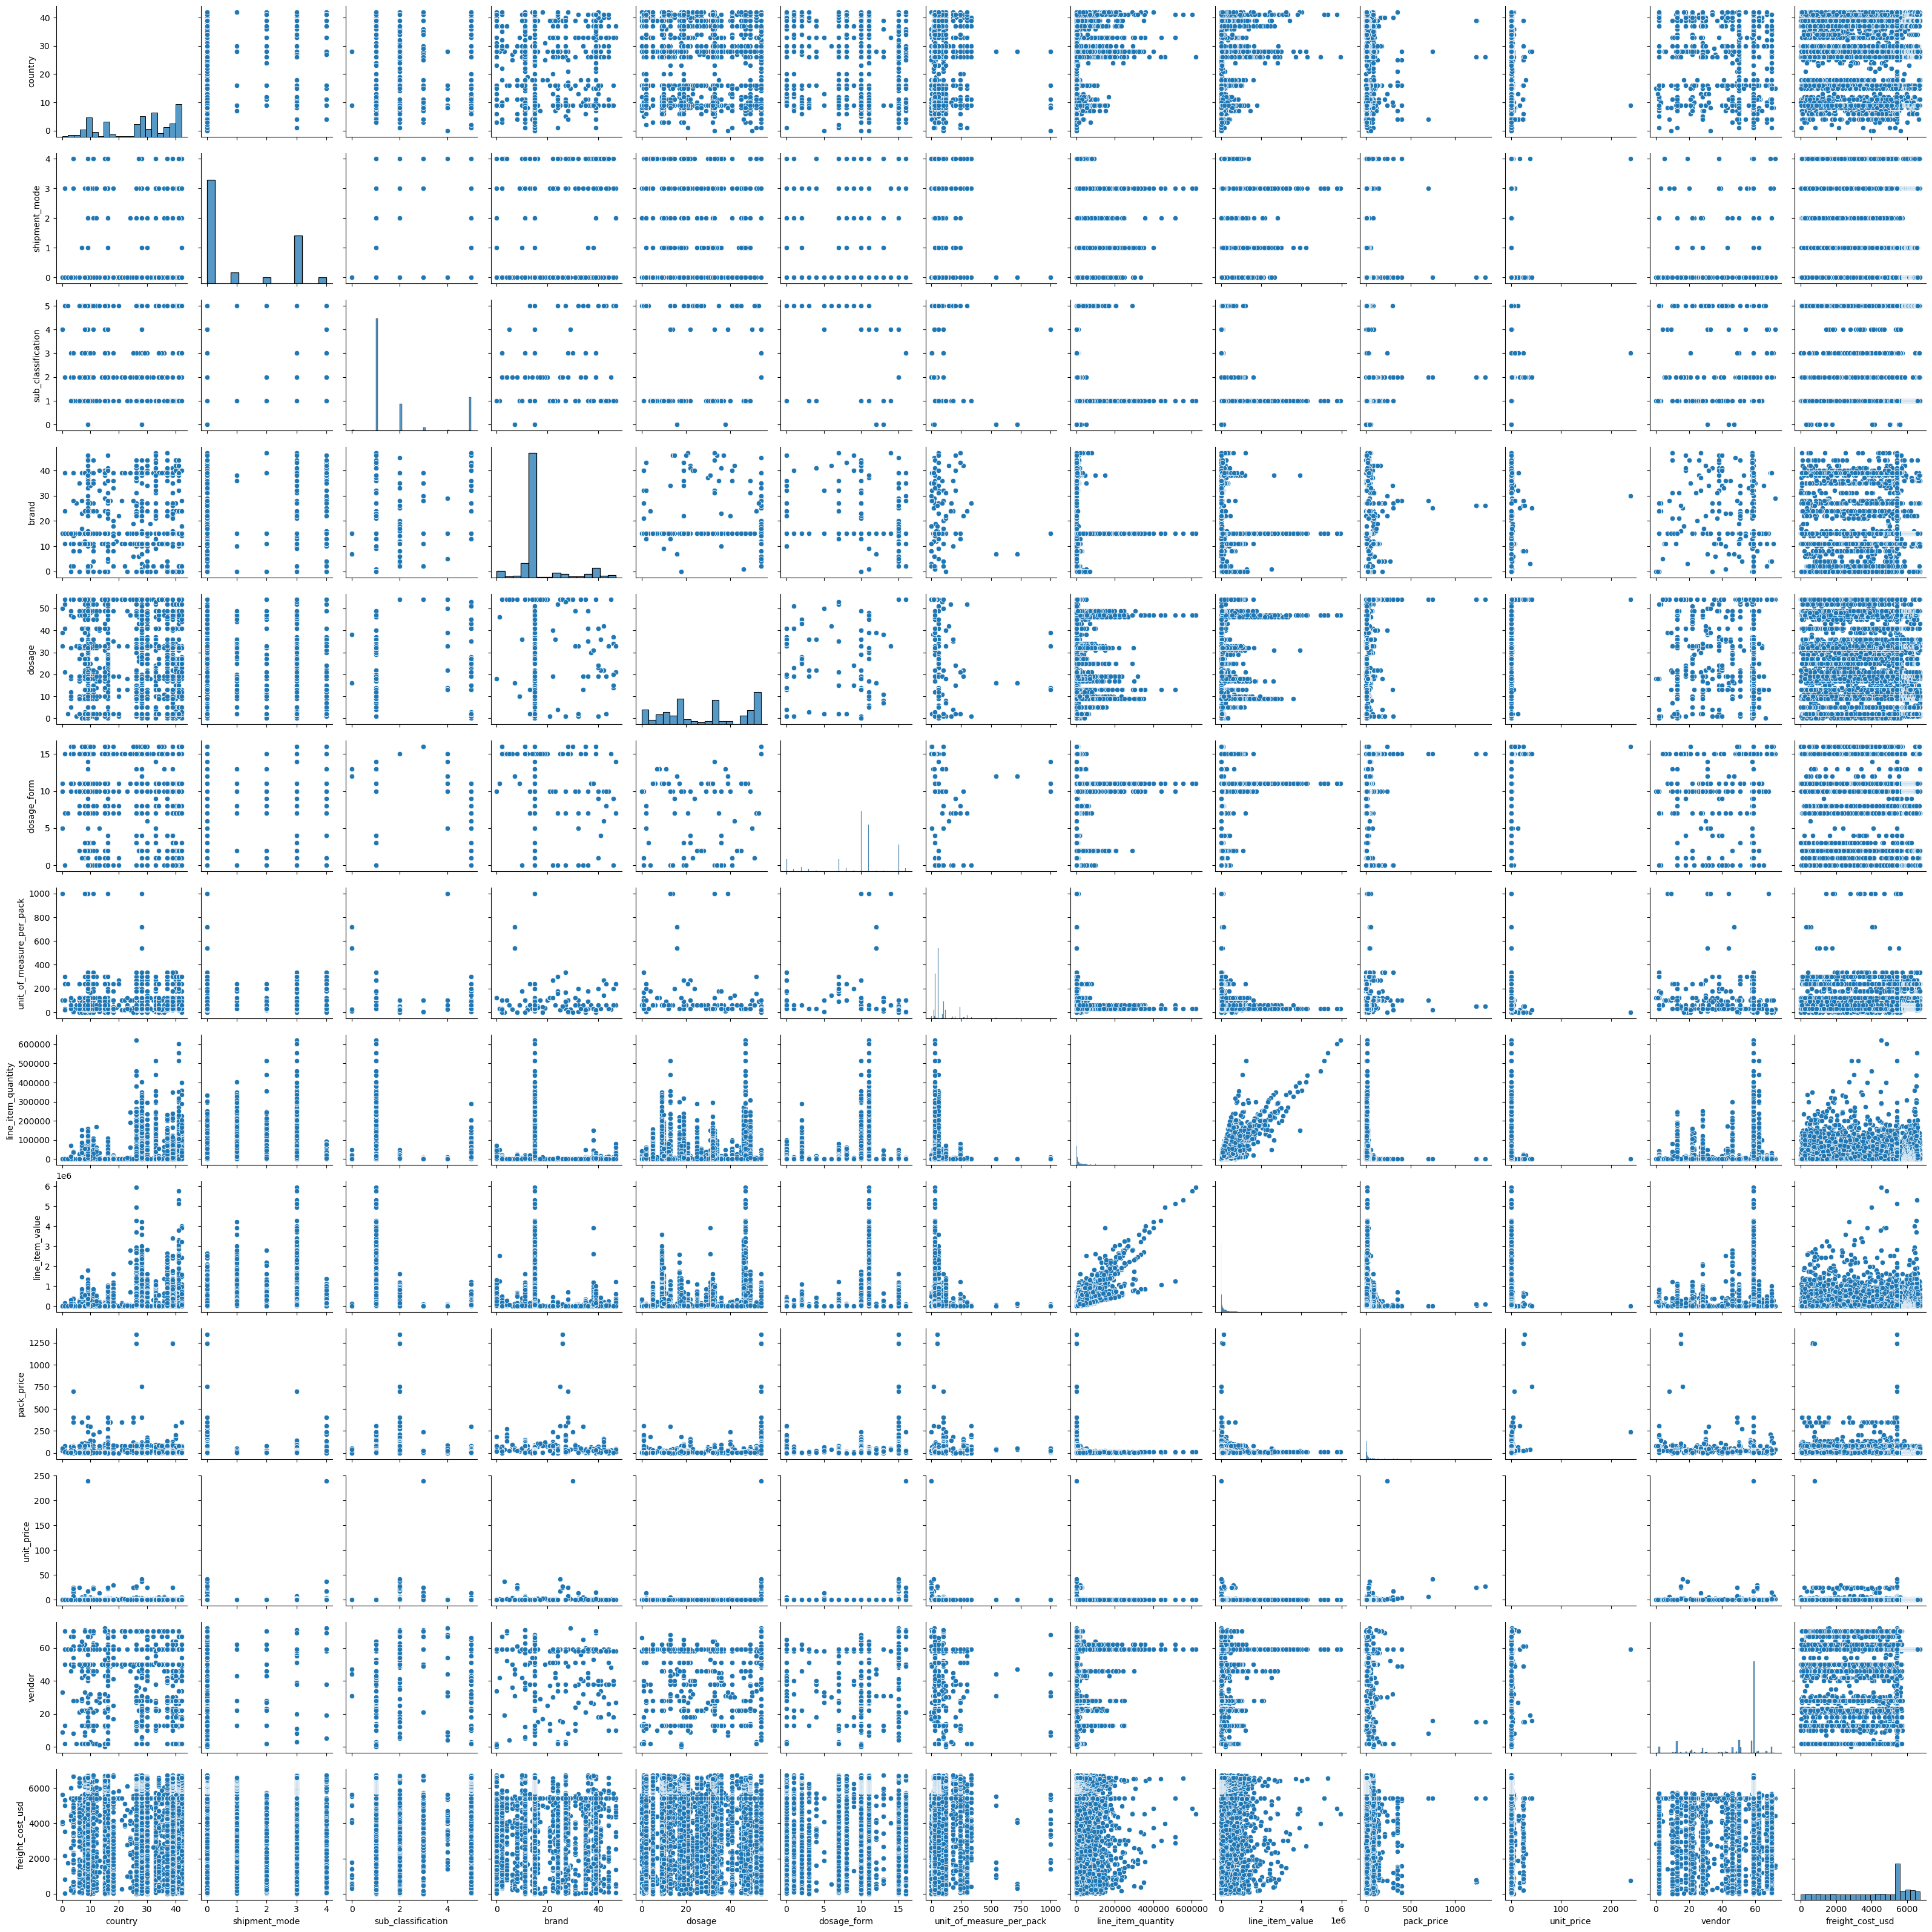

In [20]:
Line_item_Quantity=HP_SC[['country', 'shipment_mode', 'sub_classification', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_per_pack', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price','vendor','freight_cost_usd']]
sb.pairplot(Line_item_Quantity)

In [21]:
Line_item_Quantity=HP_SC[['country', 'shipment_mode', 'sub_classification', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_per_pack', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price','vendor','freight_cost_usd']]
corr=Line_item_Quantity.corr()
corr

country  shipment_mode  sub_classification  \
country                   1.000000       0.231290           -0.100773   
shipment_mode             0.231290       1.000000           -0.028587   
sub_classification       -0.100773      -0.028587            1.000000   
brand                    -0.025714      -0.009063            0.127254   
dosage                   -0.056868      -0.129952           -0.073154   
dosage_form              -0.040429      -0.154626           -0.397048   
unit_of_measure_per_pack -0.094201      -0.037777            0.468885   
line_item_quantity        0.148060       0.192219           -0.195084   
line_item_value           0.108274       0.125536           -0.203163   
pack_price               -0.081000      -0.129255           -0.030494   
unit_price               -0.078119      -0.058610           -0.002015   
vendor                   -0.087444       0.252249           -0.083594   
freight_cost_usd         -0.020886       0.157600            0.016490   

                             brand    dosage  dosage_form  \
country                  -0.025714 -0.056868    -0.040429   
shipment_mode            -0.009063 -0.129952    -0.154626   
sub_classification        0.127254 -0.073154    -0.397048   
brand                     1.000000  0.105212    -0.067813   
dosage                    0.105212  1.000000     0.375235   
dosage_form              -0.067813  0.375235     1.000000   
unit_of_measure_per_pack -0.033211 -0.249695    -0.208547   
line_item_quantity       -0.097293 -0.073471     0.054338   
line_item_value          -0.101927  0.038919     0.146590   
pack_price                0.052361  0.300194     0.248228   
unit_price                0.016870  0.183301     0.171376   
vendor                    0.003702  0.047127     0.117945   
freight_cost_usd          0.039762 -0.107595    -0.132761   

                          unit_of_measure_per_pack  line_item_quantity  \
country                                  -0.094201            0.148060   
shipment_mode                            -0.037777            0.192219   
sub_classification                        0.468885           -0.195084   
brand                                    -0.033211           -0.097293   
dosage                                   -0.249695           -0.073471   
dosage_form                              -0.208547            0.054338   
unit_of_measure_per_pack                  1.000000           -0.151020   
line_item_quantity                       -0.151020            1.000000   
line_item_value                          -0.128666            0.839081   
pack_price                                0.097182           -0.133651   
unit_price                               -0.102806           -0.052227   
vendor                                   -0.152456            0.038704   
freight_cost_usd                          0.018397           -0.066673   

                          line_item_value  pack_price  unit_price    vendor  \
country                          0.108274   -0.081000   -0.078119 -0.087444   
shipment_mode                    0.125536   -0.129255   -0.058610  0.252249   
sub_classification              -0.203163   -0.030494   -0.002015 -0.083594   
brand                           -0.101927    0.052361    0.016870  0.003702   
dosage                           0.038919    0.300194    0.183301  0.047127   
dosage_form                      0.146590    0.248228    0.171376  0.117945   
unit_of_measure_per_pack        -0.128666    0.097182   -0.102806 -0.152456   
line_item_quantity               0.839081   -0.133651   -0.052227  0.038704   
line_item_value                  1.000000   -0.018809   -0.019583  0.048344   
pack_price                      -0.018809    1.000000    0.250043 -0.088054   
unit_price                      -0.019583    0.250043    1.000000  0.030886   
vendor                           0.048344   -0.088054    0.030886  1.000000   
freight_cost_usd                -0.091274   -0.089458   -0.051277  0.133150   

     

****

## Data Visualisation

***GroupBy:***

Country,	Shipment Mode,	Product Group,	Sub Classification,	Brand,	Vendor, Dosage,	Dosage Form are divided into distinct groups using the "group by" method, and in each category, the key elements like Value, Costs, and Order quantities are examined.

In [22]:
Product = HPSCData.groupby('product_group') 
Brand = HPSCData.groupby('brand')
Manufacturing_site=HPSCData.groupby('manufacturing_site')
Sub_group=HPSCData.groupby('sub_classification')
Shippment=HPSCData.groupby('shipment_mode')
Vendor=HPSCData.groupby('vendor')
Location=HPSCData.groupby('country')
Dosage=HPSCData.groupby('dosage')
Dosage_form=HPSCData.groupby('dosage_form')

In [23]:
le = preprocessing.LabelEncoder()# create the Labelencoder object
HPSCData['freight_cost_usd']= le.fit_transform(HPSCData['freight_cost_usd'])#convert the categorical columns into numeric
HPSCData['manufacturing_site']= le.fit_transform(HPSCData['manufacturing_site'])#convert the categorical columns into numeric

***

### Brand Analysis

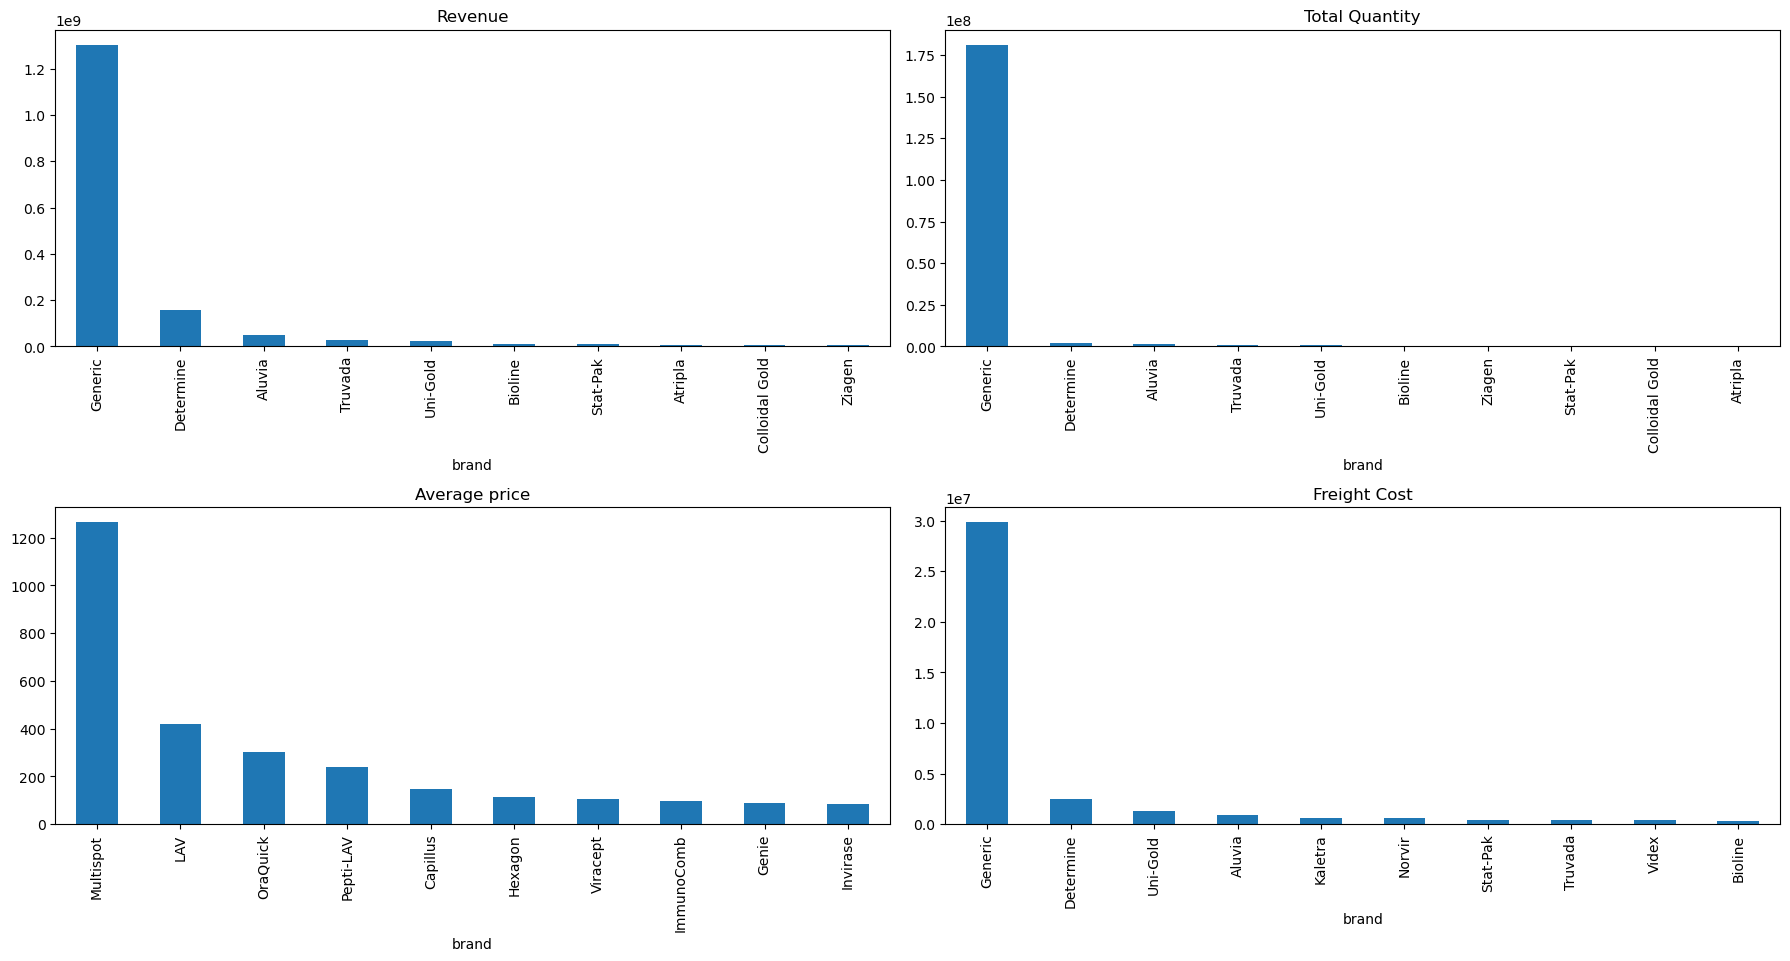

In [24]:

plt.figure(figsize=(10,12))
plt.subplot(4, 2, 1)
Brand['line_item_value'].sum().sort_values(ascending=False).head(10).plot.bar(figsize=(18,18), title="Revenue")

plt.subplot(4, 2, 2)
Brand['line_item_quantity'].sum().sort_values(ascending=False).head(10).plot.bar(figsize=(18,18), title="Total Quantity")

plt.subplot(4, 2, 3)
Brand['pack_price'].mean().sort_values(ascending=False).head(10).plot.bar(figsize=(18,18), title="Average price")

plt.subplot(4, 2, 4)
Brand['freight_cost_usd'].sum().sort_values(ascending=False).head(10).plot.bar(figsize=(18,18), title='Freight Cost')


plt.tight_layout()
plt.show()




<Axes: ylabel='brand'>

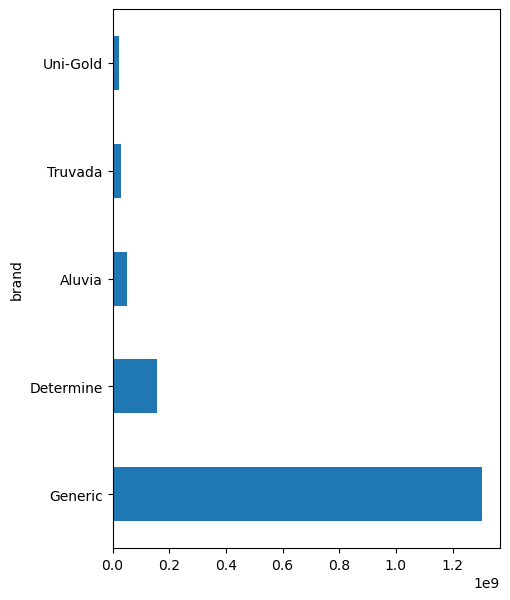

In [25]:
fig, ax = plt.subplots(figsize=(5,7))

HPSCData.groupby('brand')['line_item_value'].sum().sort_values(ascending=False).head(5).plot.barh()

****

### Sub Category Analysis

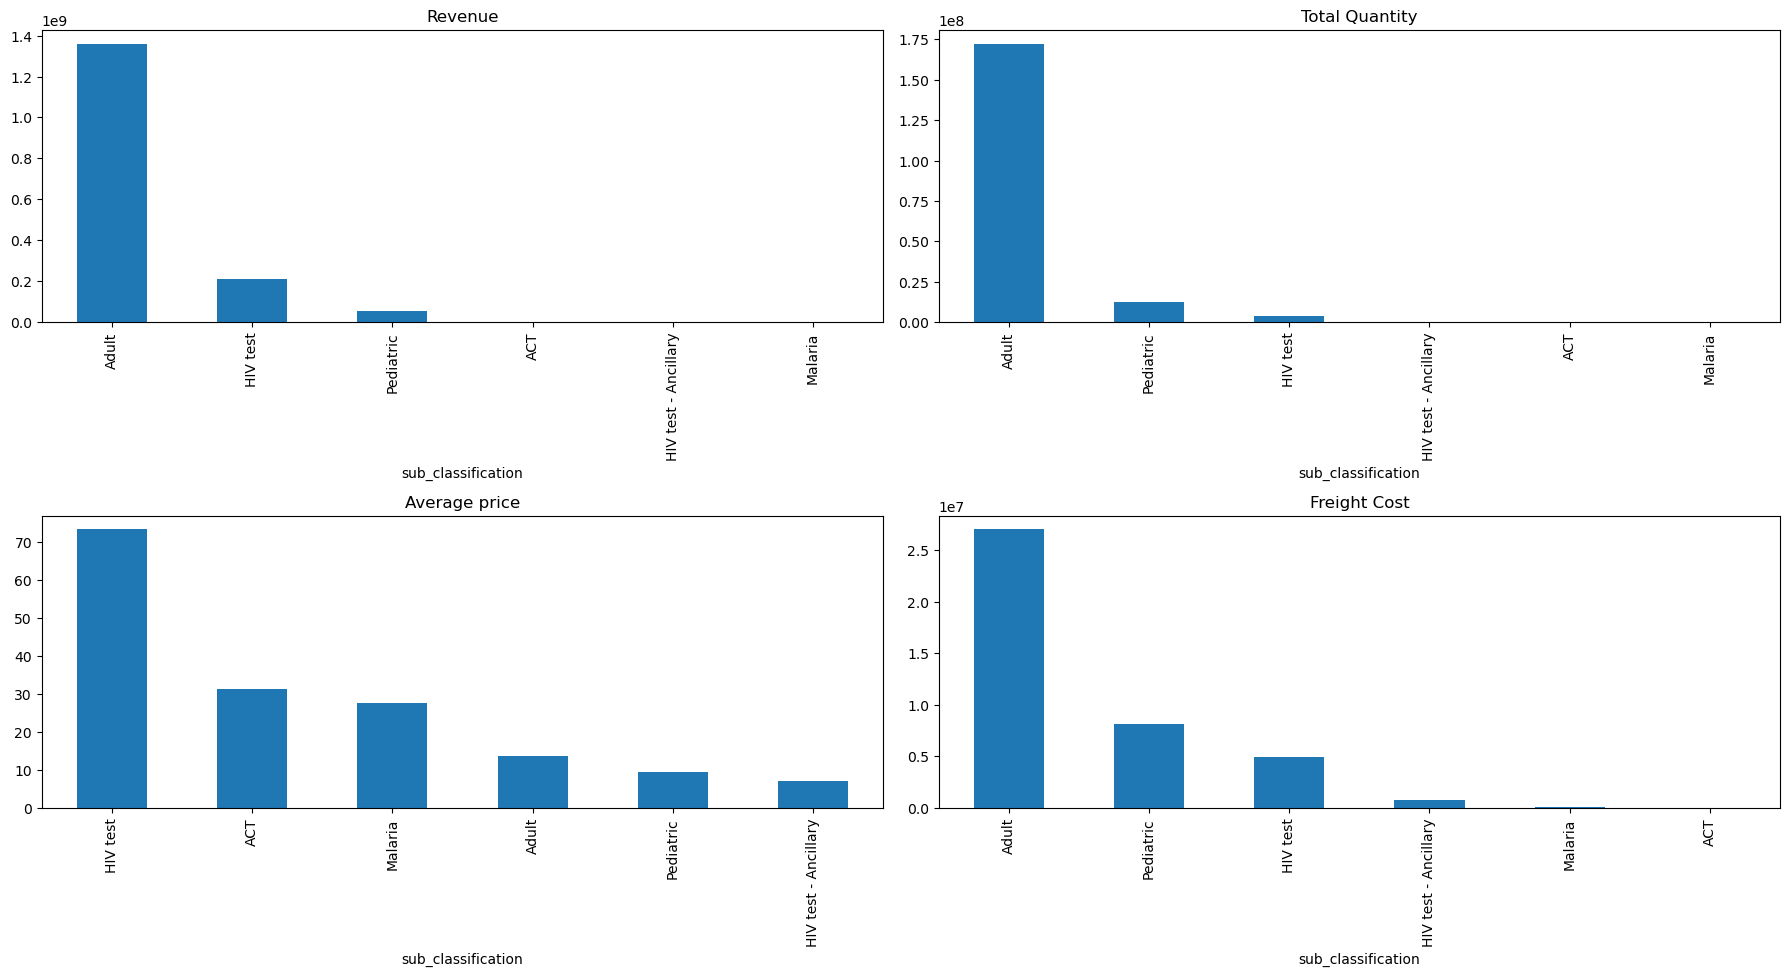

In [26]:
plt.figure(figsize=(10,12))
plt.subplot(4, 2, 1)
Sub_group['line_item_value'].sum().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Revenue")

plt.subplot(4, 2, 2)
Sub_group['line_item_quantity'].sum().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Total Quantity")

plt.subplot(4, 2, 3)
Sub_group['pack_price'].mean().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Average price")

plt.subplot(4, 2, 4)
Sub_group['freight_cost_usd'].sum().sort_values(ascending=False).plot.bar(figsize=(18,18), title='Freight Cost')


plt.tight_layout()
plt.show()


data_Customers=HPSCData.groupby(['sub_classification'])['id'].count().reset_index(name='line_item_quantity').sort_values(by= 'line_item_quantity', ascending= False)
px.pie(data_Customers, values='line_item_quantity', names= 'sub_classification' , title= 'Sub Classification', 
       color='sub_classification',
             color_discrete_map={'ACT':'lightgreen',
                                 'Adult':'blue',
                                 'HIV test':'navajowhite',
                              'HIV test - Ancillary':'crimson',
                               'Malaria':'orange',
                             'Pediatric':'lawngreen' })


<Axes: xlabel='line_item_quantity', ylabel='Density'>

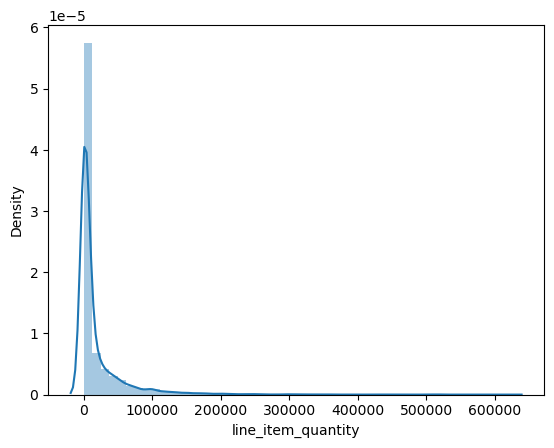

In [27]:
sns.distplot(HPSCData['line_item_quantity'])

*****

### Shippment Analysis

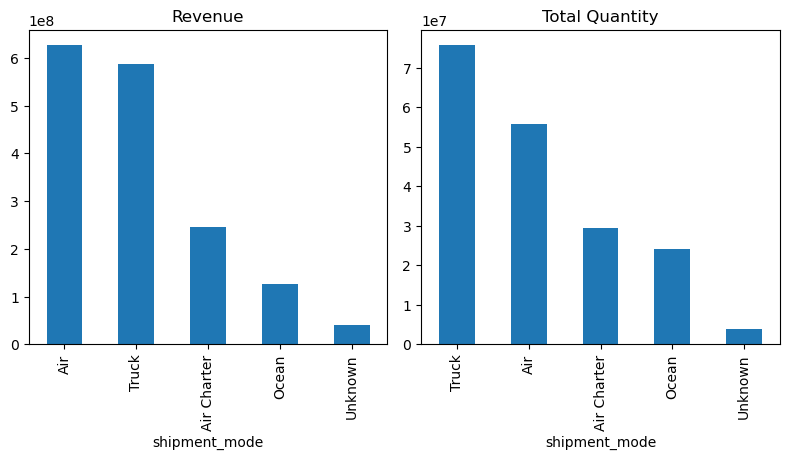

In [28]:
plt.figure(figsize=(10,12))
plt.subplot(2, 2, 1)
Shippment['line_item_value'].sum().sort_values(ascending=False).plot.bar(figsize=(8,8), title="Revenue")

plt.subplot(2, 2, 2)
Shippment['line_item_quantity'].sum().sort_values(ascending=False).plot.bar(figsize=(8,8), title="Total Quantity")

plt.tight_layout()
plt.show()



data_Customers=HPSCData.groupby(['shipment_mode'])['pq_#'].count().reset_index(name='freight_cost_usd').sort_values(by= 'freight_cost_usd', ascending= False)
px.pie(data_Customers, values='freight_cost_usd', names= 'shipment_mode' , title= 'Shipment Mode by Costs', 
       color='shipment_mode',
             color_discrete_map={'Air':'cyan',
                                 'Truck' :'navajowhite',
                                  'Ocean':'blue',
                              'Air Charter':'orange',
                               'Unknown':'crimson'})


<Axes: xlabel='line_item_insurance_usd', ylabel='shipment_mode'>

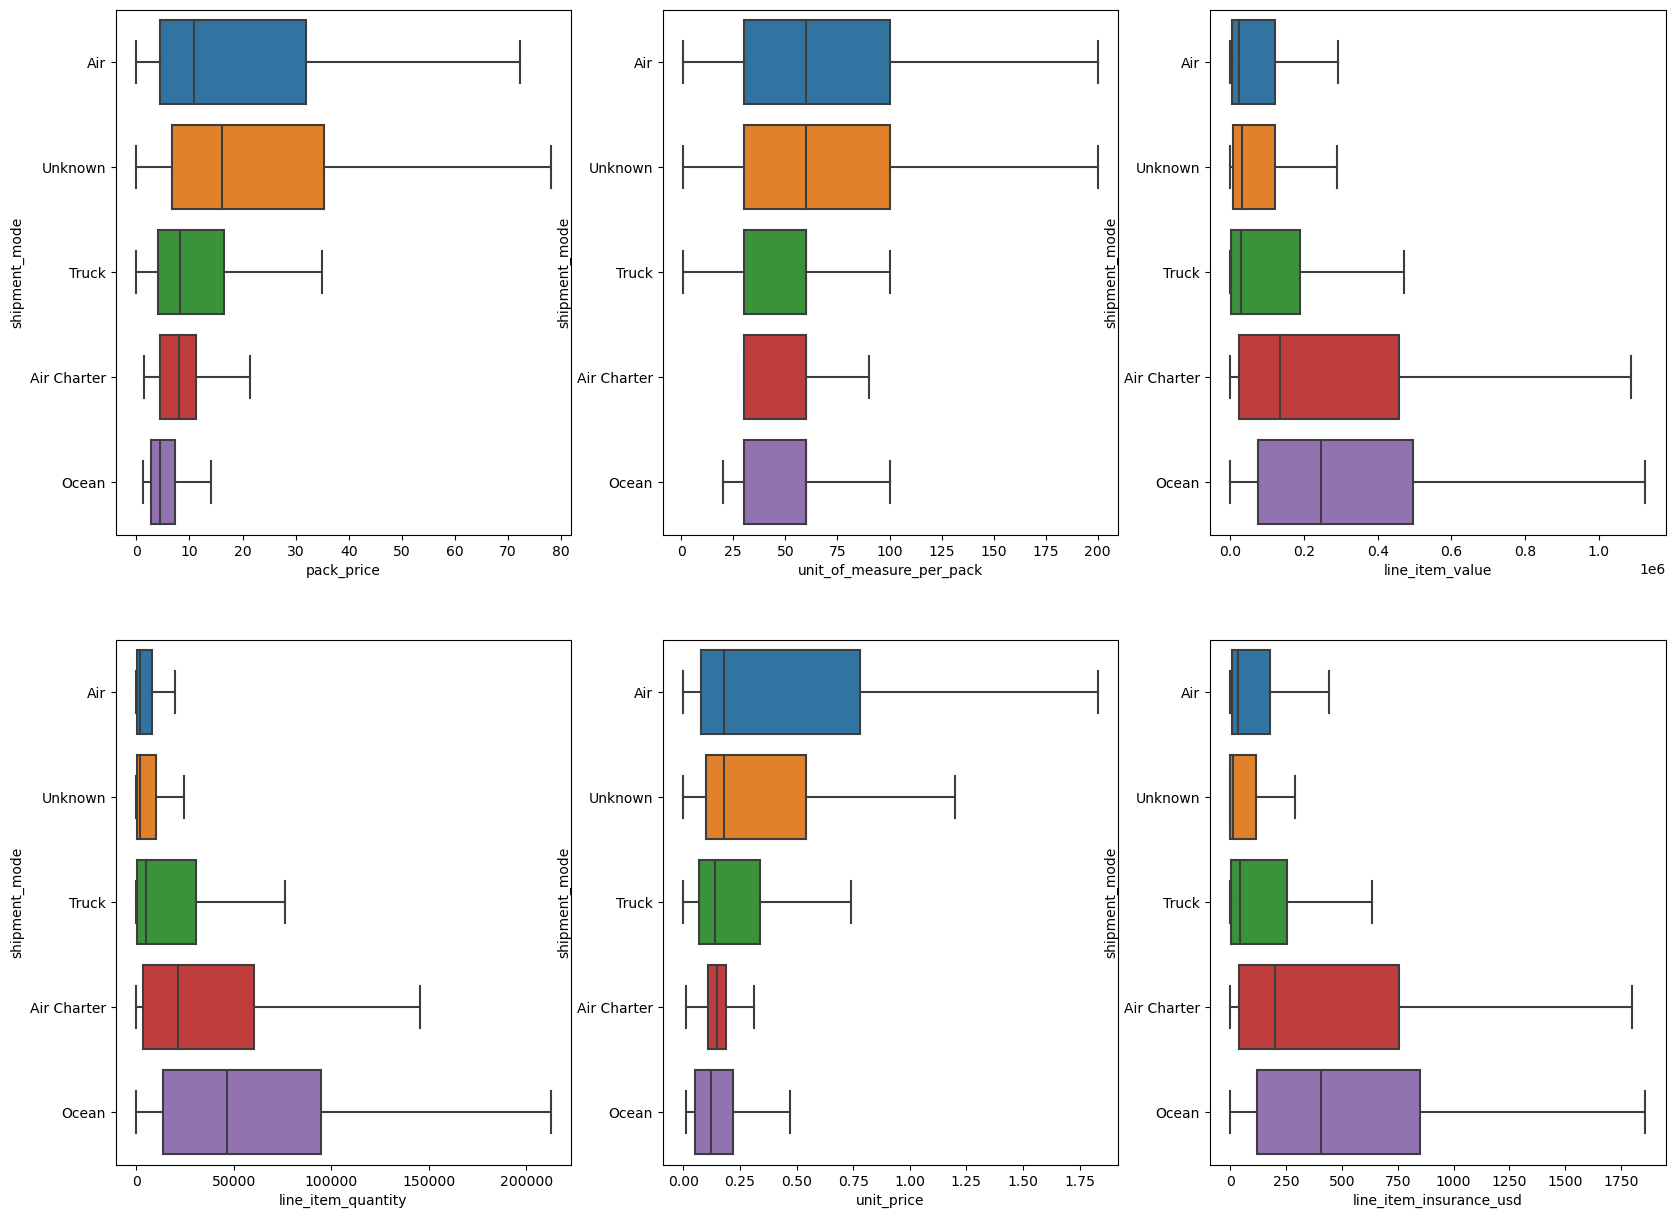

In [29]:
plt.figure(figsize=(20,15))
plt.subplot(2, 3, 1)
sns.boxplot(data=HPSCData, x="pack_price", y="shipment_mode",showfliers=False)

plt.subplot(2, 3, 2)
sns.boxplot(data=HPSCData, x="unit_of_measure_per_pack", y="shipment_mode",showfliers=False)

plt.subplot(2,3,3)
sns.boxplot(data=HPSCData, x="line_item_value", y="shipment_mode",showfliers=False)

plt.subplot(2,3,4)
sns.boxplot(data=HPSCData, x="line_item_quantity", y="shipment_mode",showfliers=False)

plt.subplot(2,3,5)
sns.boxplot(data=HPSCData, x="unit_price", y="shipment_mode", showfliers=False)

plt.subplot(2,3,6)
sns.boxplot(data=HPSCData, x="line_item_insurance_usd", y="shipment_mode", showfliers=False)

In [30]:
first_shipment = HPSCData['delivery_recorded_date'].min()
last_shipment = HPSCData['delivery_recorded_date'].max()
print("The first shipment took place on " + first_shipment + " and the last shipment took place on " + last_shipment)

The first shipment took place on 1-Apr-08 and the last shipment took place on 9-Sep-15


In [31]:

value_counts = HPSCData['country'].value_counts()#calculation the frequency of  Logistics
Share = HPSCData['country'].value_counts(normalize=True)#calculating the Share of Logistics 
Logistics_table = pd.concat([value_counts, Share], axis=1)
Logistics_table.columns = ['Frequency of  Logistics', 'Share of Logistics (%)']
Logistics_table['Share of Logistics (%)'] = Logistics_table['Share of Logistics (%)'] * 100#transforming  into percentages
Logistics_table['Share of Logistics (%)'] = Logistics_table['Share of Logistics (%)'].round(2)
Logistics_table.reset_index(inplace=True)
Logistics_table.rename(columns={'index': 'Country'}, inplace=True)
print(Logistics_table)

               Country  Frequency of  Logistics  Share of Logistics (%)
0         South Africa                     1406                   13.62
1              Nigeria                     1194                   11.57
2        Côte d'Ivoire                     1083                   10.49
3               Uganda                      779                    7.55
4              Vietnam                      688                    6.66
5               Zambia                      683                    6.62
6                Haiti                      655                    6.34
7           Mozambique                      631                    6.11
8             Zimbabwe                      538                    5.21
9             Tanzania                      519                    5.03
10              Rwanda                      430                    4.17
11          Congo, DRC                      333                    3.23
12              Guyana                      237                 

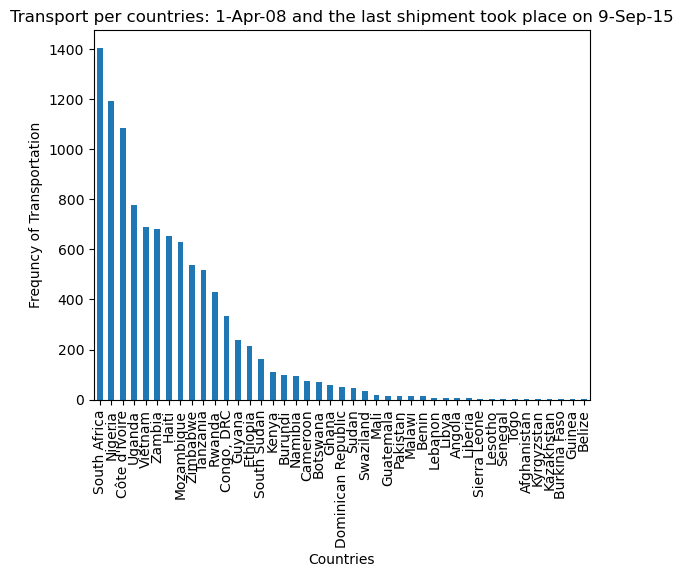

In [32]:
value_counts.plot(kind="bar")
plt.xlabel('Countries')
plt.ylabel('Frequncy of Transportation')
plt.title('Transport per countries: 1-Apr-08 and the last shipment took place on 9-Sep-15')
plt.show()

****

### Country Analysis

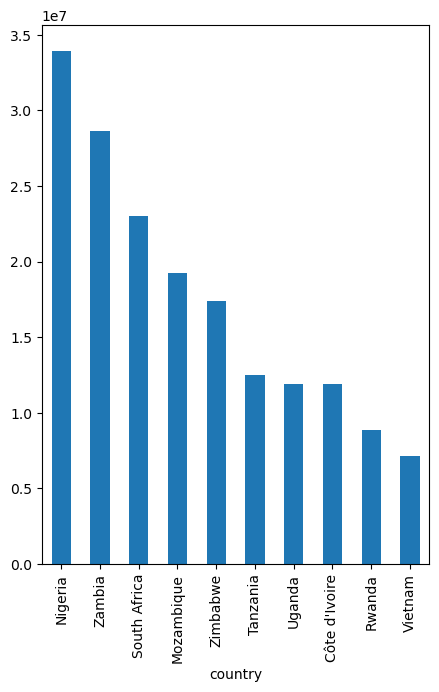

In [33]:
fig, ax = plt.subplots(figsize=(5,7))
HPSCData.groupby('country')['line_item_quantity'].sum().sort_values(ascending=False).head(10).plot.bar(ax=ax);

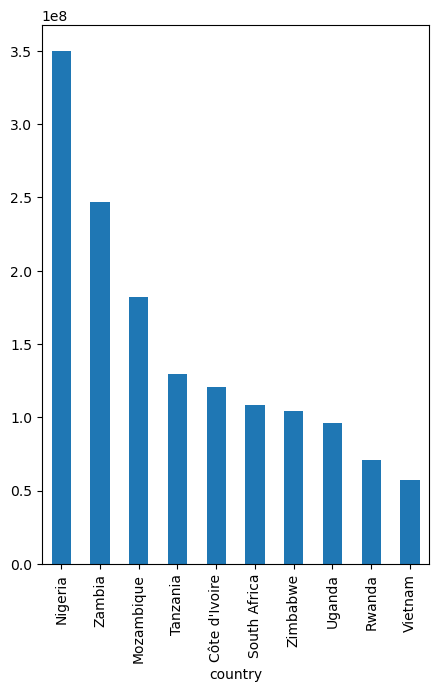

In [34]:
fig, ax = plt.subplots(figsize=(5,7))
HPSCData.groupby('country')['line_item_value'].sum().sort_values(ascending=False).head(10).plot.bar(ax=ax);

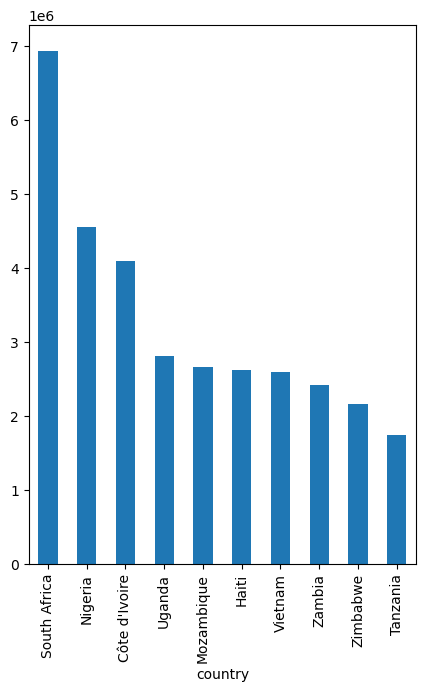

In [35]:
fig, ax = plt.subplots(figsize=(5,7))
HPSCData.groupby('country')['freight_cost_usd'].sum().sort_values(ascending=False).head(10).plot.bar(ax=ax);

*****

## Data Modelling

### Regression Models

Regression models can identify patterns, recognize demand indications, and identify correlations between variables in large datasets. According to [McKinsey](#4) ML-based supply chain solutions can cut prediction mistakes by up to 50%.

In [36]:
train_HPSC = HP_SC.copy()

#### Linear Regression for *Line-Item Quantity*

In [37]:
X=train_HPSC[['country',
       'shipment_mode',
      'sub_classification',
      'brand', 'dosage',
       'dosage_form', 'unit_of_measure_per_pack',  'pack_price', 'unit_price',
    'freight_cost_usd']]

Y=train_HPSC[['line_item_quantity']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
scaler = StandardScaler()# Scale the data 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

LinearRegression()

In [40]:
# Evaluate the model on the testing set
Y_pred = model.predict(X_test_scaled)
r2 = r2_score(Y_test, Y_pred)
ols_model = sm.OLS(HP_SC['line_item_quantity'], X)
results = ols_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     line_item_quantity   R-squared (uncentered):                   0.254
Model:                            OLS   Adj. R-squared (uncentered):              0.253
Method:                 Least Squares   F-statistic:                              350.5
Date:                Sun, 03 Sep 2023   Prob (F-statistic):                        0.00
Time:                        14:29:40   Log-Likelihood:                     -1.2353e+05
No. Observations:               10324   AIC:                                  2.471e+05
Df Residuals:                   10314   BIC:                                  2.472e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
country                    474.0193     29.220     16.223      0.000     416.743     531.295
shipment_mode             5097.5081    276.942     18.406      0.000    4554.649    5640.367
sub_classification       -1860.9465    288.595     -6.448      0.000   -2426.649   -1295.244
brand                      -84.0847     42.952     -1.958      0.050    -168.278       0.109
dosage                     -97.9124     24.137     -4.057      0.000    -145.225     -50.600
dosage_form               1453.1847     93.335     15.570      0.000    1270.230    1636.140
unit_of_measure_per_pack   -24.9826      5.817     -4.295      0.000     -36.385     -13.580
pack_price                 -92.3538      9.146    -10.098      0.000    -110.282     -74.426
unit_price                -291.3040    120.709     -2.413      0.016    -527.916     -54.692
freight_cost_usd            -0.8313      0.178     -4.680      0.000      -1.180      -0.483
==============================================================================
Omnibus:                    10488.353   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           807388.726
Skew:                           4.963   Prob(JB):                         0.00
Kurtosis:                      45.171   Cond. No.                     3.43e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1-I examined the p-value for predictor variables. To decide on the retention of a predictor variable in the model, its p-value must be less than 0.05 which means that the test hypothesis is false or should be rejected.

2-If the p-value is less than 0.05, it can be said that there is a statistically significant relationship between these predictor variables and the response variable.  

3-If the p-value is greater than 0.05 for the predictor variables, it means that no effect was observed. So this variable does not affect the response variable. 

4-I performed the OLS regression model again by removing the predictor variables that had a p-value above 0.05.

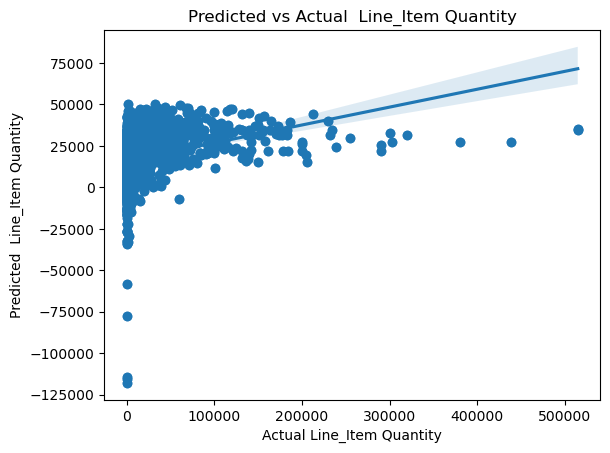

In [41]:
# Create a scatter plot with the actual Stocks Levels on the x-axis and the predicted Stocks Levels values on the y-axis
plt.scatter(Y_test, Y_pred)

# Plot a regression line to see how well the model has fit the data
sns.regplot(x=Y_test, y=Y_pred)

plt.xlabel('Actual Line_Item Quantity')
plt.ylabel('Predicted  Line_Item Quantity')
plt.title('Predicted vs Actual  Line_Item Quantity')
plt.show()

****